In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize

In [1]:
from wordcloud import WordCloud

In [ ]:
import sys
sys.path.append('../')
from utils.preprocessing import *

In [3]:
train_file_name = '..//data//raw//train//task1.train.txt'

In [4]:
articles_id, articles_content, gold_labels = ([], [], [])
with open(train_file_name, "r", encoding='utf-8') as f:
        for line in f.readlines():
            article_content, article_id, gold_label = line.rstrip().split("\t")
            articles_id.append(article_id)
            articles_content.append(article_content)
            gold_labels.append(gold_label)
print("Number of documents in the training set: %d"%(len(articles_content)))

Number of documents in the training set: 35993


In [5]:
train = pd.DataFrame({'id':articles_id, 'text': articles_content, 'target': gold_labels})

In [6]:
train.shape

(35993, 3)

In [7]:
train.head()

,id,target,text
0,727600136,non-propaganda,"Et tu, Rhody? A recent editorial in the Provi..."
1,731714618,non-propaganda,A recent post in The Farmington Mirror — our t...
2,731714635,non-propaganda,"President Donald Trump, as he often does while..."
3,728627182,non-propaganda,"February is Black History Month, and nothing l..."
4,728627443,non-propaganda,"The snow was so heavy, whipped up by gusting w..."


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35993 entries, 0 to 35992
Data columns (total 3 columns):
id        35993 non-null object
target    35993 non-null object
text      35993 non-null object
dtypes: object(3)
memory usage: 843.7+ KB


No missing (null) values

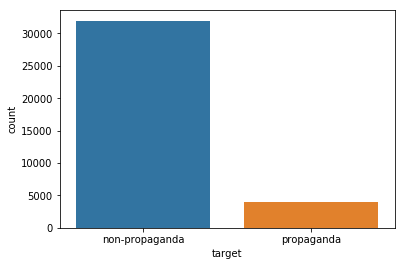

In [8]:
sns.countplot(train['target'])

Large class imbalance (hence the use of f1 score)

# Processing Text

In [9]:
train['text'] = train['text'].apply(lambda x: x.lower())

In [10]:
from nltk.tokenize import word_tokenize
train['tokens'] = train['text'].apply(word_tokenize)

In [11]:
train['len'] = train['tokens'].apply(len)

In [12]:
train.head()

,id,target,text,tokens,len
0,727600136,non-propaganda,"et tu, rhody? a recent editorial in the provi...","[et, tu, ,, rhody, ?, a, recent, editorial, in...",777
1,731714618,non-propaganda,a recent post in the farmington mirror — our t...,"[a, recent, post, in, the, farmington, mirror,...",796
2,731714635,non-propaganda,"president donald trump, as he often does while...","[president, donald, trump, ,, as, he, often, d...",1096
3,728627182,non-propaganda,"february is black history month, and nothing l...","[february, is, black, history, month, ,, and, ...",1419
4,728627443,non-propaganda,"the snow was so heavy, whipped up by gusting w...","[the, snow, was, so, heavy, ,, whipped, up, by...",671


In [13]:
train.describe()

,len
count,35993.000000
mean,668.990582
std,585.766131
min,9.000000
25%,314.000000
50%,526.000000
75%,869.000000
max,19093.000000


In [14]:
train.groupby('target')['len'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
non-propaganda,31972.0,618.805330,521.589337,9.0,296.75,496.0,810.0,19093.0
propaganda,4021.0,1068.026362,853.872627,14.0,541.00,883.0,1330.0,11900.0


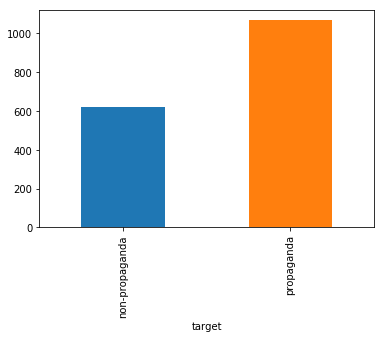

In [26]:
train.groupby('target')['len'].describe()['mean'].plot.bar()

The average propaganda containing news is significantly longer

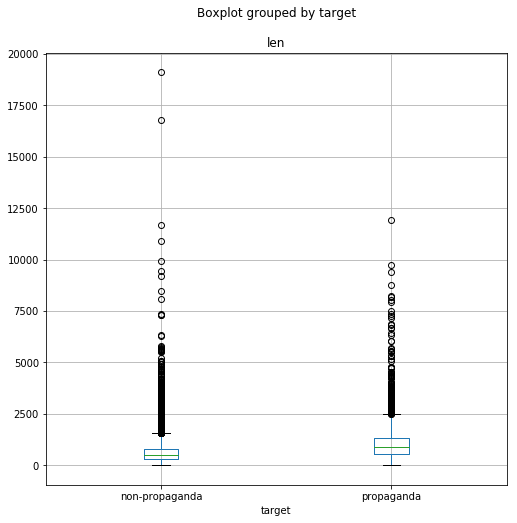

In [25]:
train.boxplot(column='len', by='target', figsize=(8,8))

# Looking at Text

In [16]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

## Looking at Propaganda Text

In [18]:
propaganda_text = ' '.join(train[train['target']=='propaganda']['text'])

In [29]:
propaganda_text[:100]

'new york — a dominican national was sentenced friday to an additional 30 years’ imprisonment after b'

In [20]:
propaganda_words = nltk.word_tokenize(propaganda_text)

In [33]:
propaganda_words[:20]

['new',
 'york',
 '—',
 'a',
 'dominican',
 'national',
 'was',
 'sentenced',
 'friday',
 'to',
 'an',
 'additional',
 '30',
 'years',
 '’',
 'imprisonment',
 'after',
 'being',
 'convicted',
 'of']

In [32]:
propaganda_sas = nltk.Text(propaganda_words)

News is mostly about American politics (surprise)

In [34]:
# collocations are frequent word pairs
propaganda_sas.collocations()

united states; new york; supreme court; donald trump; brett kavanaugh;
north korea; president trump; hillary clinton; white house; outpost
updates; democrat politician; validation purposes; corrupt democrat;
law enforcement; article posted; freedom outpost; poll grants; updates
free; left unchanged; privacy policy


In [21]:
# Looking at long words in the text
propaganda_longWords = [w for w in set(propaganda_words) if len(w) > 15]
propaganda_longWords

['sophistication—but',
 'anti-federalists',
 '//ppe.mercatus.org/',
 'symptom-positive',
 'democrat/republican',
 'soldierinvestigation',
 'yiddish-speaking',
 'underrepresented',
 'peace-processing',
 '//www.superscholar.org/rankings/economics/top-austrian-free-market-programs/',
 'donor-turned-felon',
 '//www.mises.org/journals/jls/21_1/21_1_5.pdf',
 'officials—elected',
 'criminally-minded',
 'page=commerce_page014',
 '//t.co/uc84lohz1m',
 'russian-specific',
 'left-libertarianism',
 '//t.co/mbgqtehhzm',
 '//mises.org/journals/jls/22_1/22_1_26.pdf',
 'pic.twitter.com/gmdxg36xt3',
 'happen—completely',
 'christians—slough',
 'government-stacked',
 'twenty-first-century',
 'neo-conservatives',
 '//t.co/oxe50mg7my',
 'immigration—republicans',
 '//www.academia.edu/1359832/saving_and_investment_a_praxeological_approach',
 '-an-islamist-charte',
 'family-crippling',
 'jihadist-inspired',
 '//www.baylor.edu/business/entrepreneurship/',
 'pic.twitter.com/k7psosdqik',
 'too-clever-by-half',

Many words unnecessarily linked with '-', this may lead to loss of info

Additional preprocessing needed during tokenisation:
* Replace links
* Split by - / …

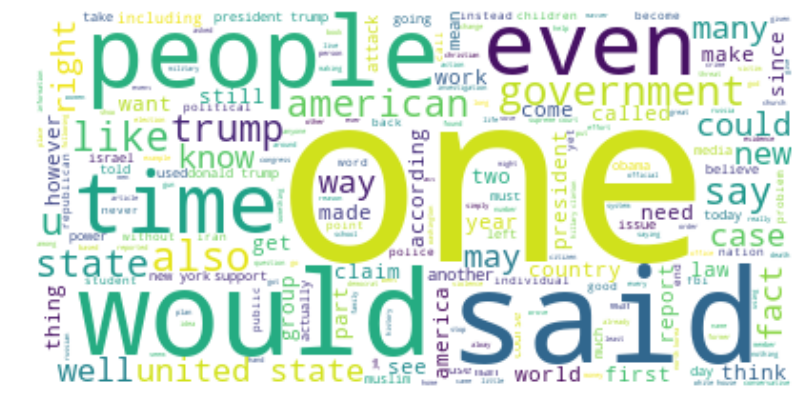

In [22]:
plt.figure(figsize=(20, 7)) 
wc = WordCloud(background_color='white', stopwords=stopwords).generate(propaganda_text)
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')

## Looking at Non-propaganda Text

In [23]:
nonpropaganda_text = ' '.join(train[train['target']=='non-propaganda']['text'])

In [43]:
nonpropaganda_text[:100]

'et tu, rhody?  a recent editorial in the providence journal cataloged everything it could find wrong'

In [30]:
nonpropaganda_words = nltk.word_tokenize(nonpropaganda_text)

In [45]:
nonpropaganda_words[:20]

['et',
 'tu',
 ',',
 'rhody',
 '?',
 'a',
 'recent',
 'editorial',
 'in',
 'the',
 'providence',
 'journal',
 'cataloged',
 'everything',
 'it',
 'could',
 'find',
 'wrong',
 'with',
 'connecticut']

In [46]:
nonpropaganda_sas = nltk.Text(nonpropaganda_words)

In [47]:
# collocations are interesting word pairs
nonpropaganda_sas.collocations()

united states; prime minister; white house; north korea; donald trump;
last year; new york; president donald; last week; saudi arabia; human
rights; high school; supreme court; middle east; last month; social
media; per cent; attorney general; north korean; nuclear deal


Mostly the same as collocations from propaganda containing news

In [31]:
# Looking at long words in the text
nonpropaganda_longWords = [w for w in set(nonpropaganda_words) if len(w) > 15]
nonpropaganda_longWords

['spray-glittering',
 '//t.co/ueqogl9zpo',
 'coinmarketcap.this',
 'thataccommodation',
 'folsomhistoricalsociety.org',
 'civil-rights-era',
 'education.during',
 'biological-weapon',
 'gst-free-internet-',
 'increase.muslims',
 'shutterbugs.bandgi',
 '//politi.co/2ir6o8c',
 'berlin-weissensee',
 'pharmaceutical-grade',
 'government-allotted',
 'power—surveillance—and',
 'nearby.according',
 'indigenous-style',
 'pic.twitter.com/suzvesxdqs',
 '//t.co/g8rwiujn7ypic.twitter.com/nv2itdhmbg',
 '//politi.co/2i2yumz',
 'under-graduation',
 'abduction.nemati',
 'avengersinfinitywar',
 '5.56mm-resistant',
 'refuelers/maintainers',
 'happily-ever-after',
 'pic.twitter.com/i27wngdfcq',
 'disbursement.because',
 'documentary-like',
 'pic.twitter.com/exc33lvq9t',
 'jennifer-aniston-justin-theroux',
 'picture-intensive',
 'www.jeffcrouere.com',
 'cbsn-fusion-who-can-fire-robert-mueller-donald-trump-rod-rosenstein-russia-investigation-special-counsel-thumbnail-1543269-640x360.jpg',
 'battlefords-llo

Long words for news not containing propaganda seems to be less negative, and have less usage of 'pro', 'anti' etc

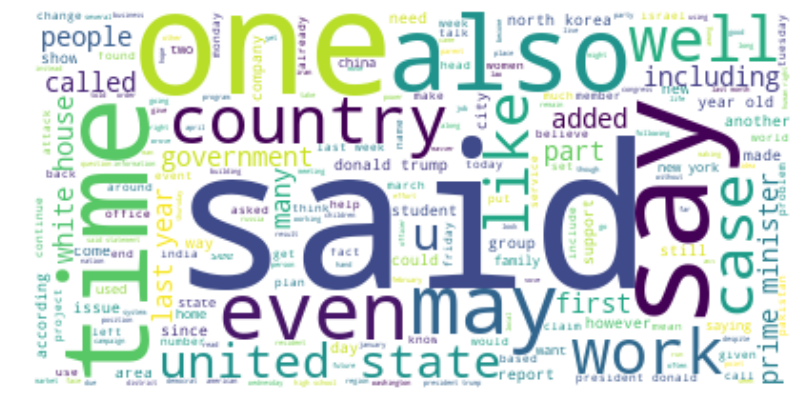

In [24]:
plt.figure(figsize=(20, 7)) 
wc2 = WordCloud(background_color='white', stopwords=stopwords).generate(nonpropaganda_text)
plt.axis("off")
plt.imshow(wc2, interpolation='bilinear')

Similar word cloud

# Tokenization with spacy

In [27]:
from spacy.en import English
parser = English()

In [33]:
spacy_tokens = [token.orth_ for token in parser(propaganda_text) if not token.orth_.isspace()]

In [34]:
# Looking at long words in the text
propaganda_longWords2 = [w for w in set(spacy_tokens) if len(w) > 15]
propaganda_longWords2

['https://t.co/o9iqkjfsoh',
 'http://t.co/lq6dkemqzm',
 'soldierinvestigation',
 'underrepresented',
 'decade.[citation',
 'http://www.nydailynews.com/news/national/soviet-diplomat-oswald-nervous-kill-jfk-cia-files-article-1.3609719',
 'pic.twitter.com/depvdspq3b',
 'www.cevroinstitut.cz',
 'beckersasc.com/gastroenterology-and-endoscopy/pesticides-possibly-increase-liver-cancer-risk.html',
 'stampingsinc@hotmail.com',
 'pic.twitter.com/ynge7gg7mr',
 'destruction,”mass',
 'democrat/“progressive',
 'http://www.lastampa.it/2017',
 'pic.twitter.com/gmdxg36xt3',
 'flirtatious,”claimed',
 'applications.[27',
 'pic.twitter.com/ztr4w7iuqc',
 'https://t.co/y8iw6cftpj',
 'http://www.jstor.org/stable/2889145',
 'http://mises.org/tradcycl/econdepr.asp',
 '@clintonemail.com',
 'https://youtu.be/hkmtxlt_h2o',
 'pic.twitter.com/k7psosdqik',
 'http://www.businessinsider.com/how-much-is-the-obamacare-penalty-tax-2012-7',
 'pic.twitter.com/1ponjta87a',
 'pic.twitter.com/7y0z7qgzhe',
 'http://guidohulsma

Spacy tokenizer seems to take care of words connected by '-' and'/'